Loading Data...
------------------------------
Train-test-validation split
------------------------------
Training Set Size =  0  subjects
Validation Set Size =  0  subjects
Test Set Size =  12  subjects
------------------------------
Train-test-validation split
------------------------------
Training Set Size =  0  subjects
Validation Set Size =  0  subjects
Test Set Size =  12  subjects
569/569 [==============================] - 2s 4ms/step
here


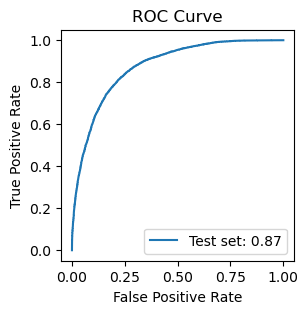

In [6]:
import os, sys, glob, random, json
import numpy as np
import tensorflow as tf
from tensorflow import keras

sys.path.append(r'C:\Users\MichaelB9\Git\deepdive23\new_ml_approach')

from helpers.plotting import train_val_curve, plot_roc
from sklearn.metrics import *
from helpers.load_data import *

with open(r'C:\Users\MichaelB9\Git\deepdive23\test_subs.txt') as file:
    test_subs=file.read()
test_subs=test_subs.split('\n')

model=tf.keras.models.load_model(r'C:\Users\MichaelB9\Git\deepdive23\new_ml_approach\saved_models\position_model_09')

target_signal='Position'
input_signals=['Flow', 'Mask Pres']

print('Loading Data...')
sig_tensor, target_tensor, subject_names = load_sig_tensor(
    test_subs[:-1],epoch_size = 30,epoch_step = 15,
    sample_rate = 25, input_signals=input_signals,
    target_signal=target_signal, #levels=5,
    dataset='s9',
    )

_, _, _, _, X_testF, y_test, subs_ = split(sig_tensor['Flow'],target_tensor,subject_names,train_size=0,val_size=0,test_size=1)
_, _, _, _, X_testP, _, _ = split(sig_tensor['Mask Pres'],target_tensor,subject_names,train_size=0,val_size=0,test_size=1)


y_pred=model.predict([X_testF,X_testP])

plt.figure(figsize=(3,3))

plot_roc(y_test,y_pred,0.5, label='Test set')
print('here')

In [23]:
test_sub.split('\\')[-1][:-4]


'JW200411.'

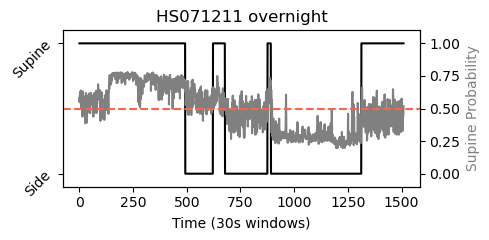

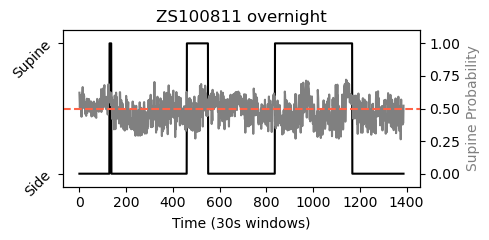

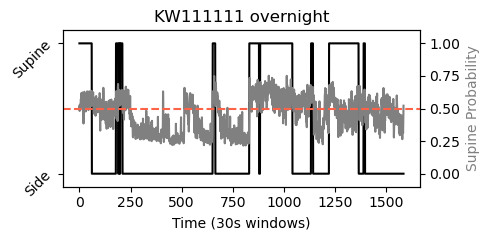

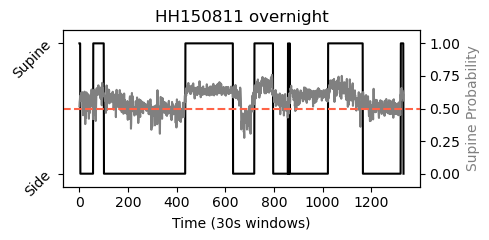

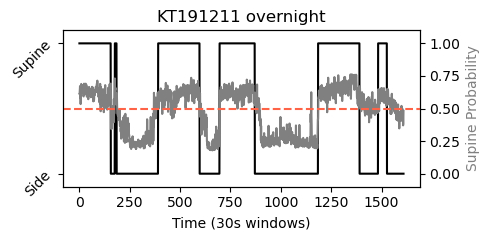

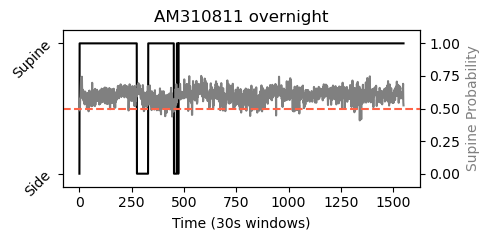

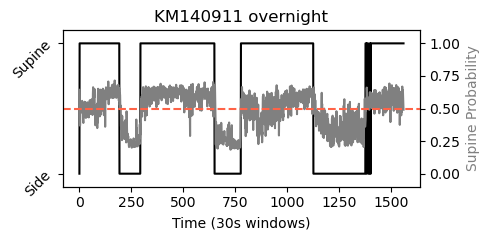

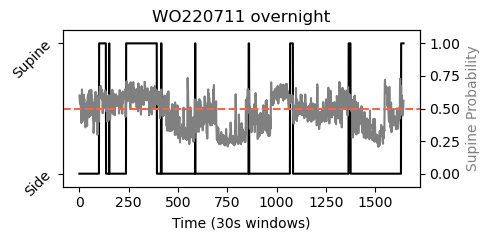

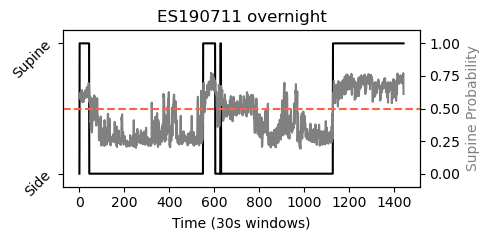

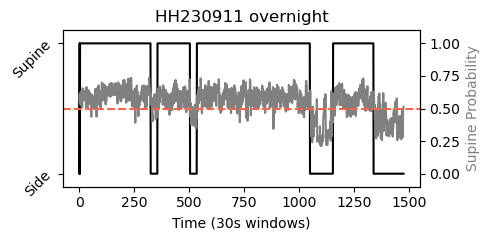

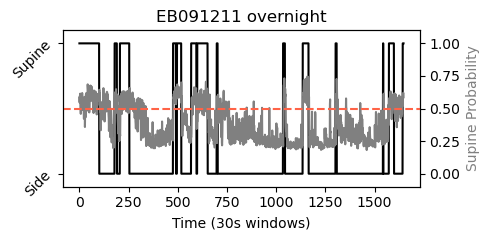

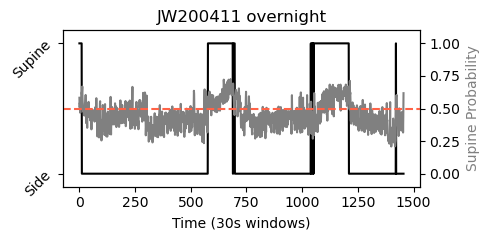

In [36]:
start_idx=0
f1=[]
leak=[]
num_events=[]
names=[]
patient_info=pd.read_csv(r'C:\Users\MichaelB9\Data\S9 AHI\Patient Info Correct Codes.csv',index_col=[0])


for test_sub in test_subs[:-1]:

    fig, ax1 = plt.subplots(figsize=(5,2.5))
    sub_=np.where(np.isin(subject_names,test_sub.split('\\')[-1][:-5]))[0]
    names.append(test_sub.split('\\')[-1][:-5])
    # y_pred_sub=y_pred[start_idx:(start_idx + len(sub_))]
    # y_test_sub=y_test[start_idx:(start_idx + len(sub_))]
    y_pred_sub=y_pred[sub_]
    y_test_sub=y_test[sub_]
    start_idx=len(sub_)

    ax2 = ax1.twinx()
    ax1.plot(y_test_sub, 'black')
    ax2.plot(y_pred_sub, 'grey')

    ax1.set_xlabel('Time (30s windows)')
    # ax1.set_ylabel('Position', color='black')
    ax1.set_yticks([0,1],['Side','Supine'],rotation=45)
    ax1.set_ylim([-.1,1.1])
    ax2.set_ylabel('Supine Probability', color='grey')
    ax2.axhline(0.5,ls='--',color='tomato')
    ax2.set_ylim([-.1,1.1])
    plt.title('{} overnight'.format(test_sub.split('\\')[-1][:-5]))
    # with open(test_sub) as json_file:
    #     data = json.load(json_file)

    # print('F1 score {}'.format(f1_score(y_test_sub,y_pred_sub>0.5)))
    patient_info.loc[test_sub.split('\\')[-1][:-5],'F1']=f1_score(y_test_sub,y_pred_sub>0.5)
    # print('Average Leak {}'.format(np.mean(data['Leak'])))
    # leak.append(np.mean(data['Leak']))
    # num_events.append(len(data['events']))

    plt.tight_layout()
   

In [38]:
names

['HS071211',
 'ZS100811',
 'KW111111',
 'HH150811',
 'KT191211',
 'AM310811',
 'KM140911',
 'WO220711',
 'ES190711',
 'HH230911',
 'EB091211',
 'JW200411']

In [40]:
patient_info=patient_info.loc[names,:]

<AxesSubplot: xlabel='Gender', ylabel='F1'>

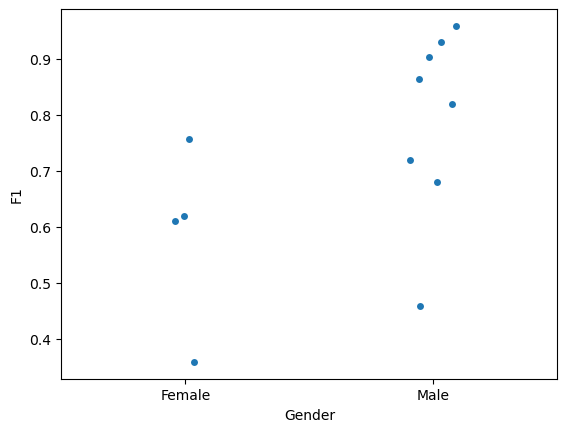

In [49]:
import seaborn as sns

# sns.boxplot(x='Gender',y='F1',data=patient_info)
sns.stripplot(x='Gender',y='F1',data=patient_info,lw=1.5)

In [41]:
patient_info.columns

Index(['patient_id', 'Age', 'Gender', 'Height (cm)', 'Mass (kg)', 'BMI',
       'Diagnostic AHI', 'Tubing', 'Mask', 'Total Sleep Time (mins)',
       'CentAp Index (#/h)', 'MixAp Index (#/h)', 'ObsAp Index (#/h)',
       'Apnea Index (#/h)', 'Hypopnea Index (#/h)', 'AHI (#/h)',
       'supine apnea', 'supine hypopnea', 'lateral apnea', 'lateral hypopnea',
       'supine AH', 'lateral AH', 'AHI', 'lateral AHI', 'supine AHI',
       'Residual OSA Class', 'supine A', 'lateral A', 'lateral AI',
       'lateral Dur', 'supine AI', 'supine Dur', 'Mask Type', 'AI',
       'Residual OSA Class Apnea', 'F1'],
      dtype='object')

<AxesSubplot: xlabel='AHI (#/h)', ylabel='F1'>

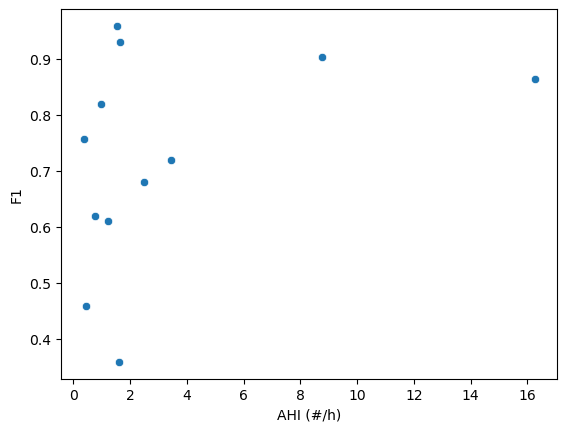

In [58]:
sns.scatterplot(x='AHI (#/h)',y='F1',data=patient_info,lw=1.5)